<a href="https://colab.research.google.com/github/Adhittiyaca/House--Price-Prediction/blob/House-price-prediction-model/House_Price_prediction_ml_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Merged ML Project Notebook

Combined work of all team members.

<a href="https://colab.research.google.com/github/Adhittiyaca/House--Price-Prediction/blob/main/01_Adhittiyacaa_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏠 House Price Prediction

**Contributors:** Adhittiyaca Saroj
                  Aashi Srivastava
                  Abhinav Kumar   

**Project Description :**

This project implements Simple Linear, Multiple Linear, Ridge, Lasso, and Polynomial Regression models from scratch using Python and NumPy. The objective is to analyze the relationship between housing features and house prices, evaluate model performance using MSE, RMSE, and R², and compare regularization techniques. The project also includes residual analysis and coefficient comparison to validate regression assumptions and perform feature selection.

In [ ]:
print("House Price Prediction project by Adhittiyaca Saroj")

House Price Prediction project by Adhittiyaca Saroj


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Selection and Loading
The California Housing dataset is used for this project. It contains numerical features related to housing prices and income levels. The dataset is loaded into a pandas DataFrame for further analysis.


In [ ]:
df = pd.read_csv('/content/california_housing.csv')
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [ ]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("\nColumn Names:\n", df.columns)


Number of rows: 20640
Number of columns: 14

Column Names:
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')


## Data Cleaning and Preprocessing

### Missing Value Analysis
Missing values are checked in the dataset to ensure data completeness. Since no missing values are found, no imputation is required.


In [ ]:
for col in df.columns:
    missing = df[col].isnull().sum()
    print(col, ":", missing)


longitude : 0
latitude : 0
housing_median_age : 0
total_rooms : 0
total_bedrooms : 0
population : 0
households : 0
median_income : 0
median_house_value : 0
ocean_proximity_<1H OCEAN : 0
ocean_proximity_INLAND : 0
ocean_proximity_ISLAND : 0
ocean_proximity_NEAR BAY : 0
ocean_proximity_NEAR OCEAN : 0


In [ ]:
for col in df.columns:
    mean_val = np.sum(df[col]) / len(df[col])
    df[col] = df[col].fillna(mean_val)


In [ ]:
for col in df.columns:
    data = df[col].values
    mean = np.sum(data) / len(data)
    std = np.sqrt(np.sum((data - mean)**2) / len(data))
    minimum = np.min(data)
    maximum = np.max(data)

    print(f"\n{col}")
    print("Mean:", mean)
    print("Std:", std)
    print("Min:", minimum)
    print("Max:", maximum)



longitude
Mean: -119.56970445736432
Std: 2.003483187746976
Min: -124.35
Max: -114.31

latitude
Mean: 35.63186143410853
Std: 2.135900653797483
Min: 32.54
Max: 41.95

housing_median_age
Mean: 28.639486434108527
Std: 12.585252725724606
Min: 1.0
Max: 52.0

total_rooms
Mean: 2635.7630813953488
Std: 2181.5624017359723
Min: 2.0
Max: 39320.0

total_bedrooms
Mean: 537.8705525375617
Std: 419.25643555055336
Min: 1.0
Max: 6445.0

population
Mean: 1425.4767441860465
Std: 1132.434687757615
Min: 3.0
Max: 35682.0

households
Mean: 499.5396802325581
Std: 382.3204908552571
Min: 1.0
Max: 6082.0

median_income
Mean: 3.8706710029069766
Std: 1.8997756945748738
Min: 0.4999
Max: 15.0001

median_house_value
Mean: 206855.81690891474
Std: 115392.82040412253
Min: 14999.0
Max: 500001.0

ocean_proximity_<1H OCEAN
Mean: 0.44263565891472867
Std: 0.4966984320207309
Min: False
Max: True

ocean_proximity_INLAND
Mean: 0.31739341085271316
Std: 0.46546195719950517
Min: False
Max: True

ocean_proximity_ISLAND
Mean: 0.00024

### Outlier Detection Using IQR Method

The Interquartile Range (IQR) method is used for outlier detection.

IQR = Q3 − Q1  
Lower Bound = Q1 − 1.5 × IQR  
Upper Bound = Q3 + 1.5 × IQR  

Any data point lying outside these bounds is considered an outlier.


In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(col, "Outliers:", outliers.shape[0])


longitude Outliers: 0
latitude Outliers: 0
housing_median_age Outliers: 0
total_rooms Outliers: 1287
total_bedrooms Outliers: 1306
population Outliers: 1196
households Outliers: 1220
median_income Outliers: 681
median_house_value Outliers: 1071


### Feature Distribution Analysis
Histograms are plotted for all numerical features to visualize their frequency distribution and identify skewness or spread in the data.


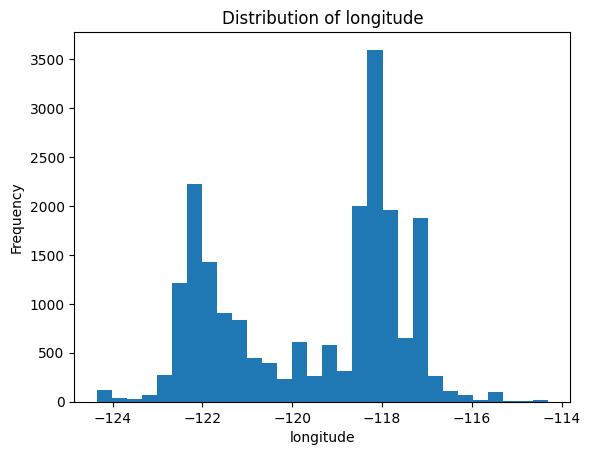

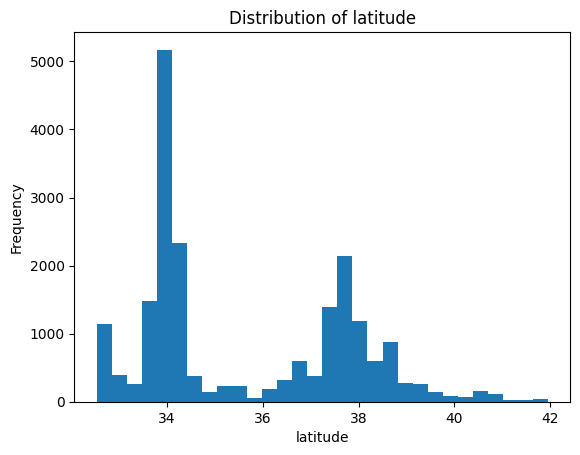

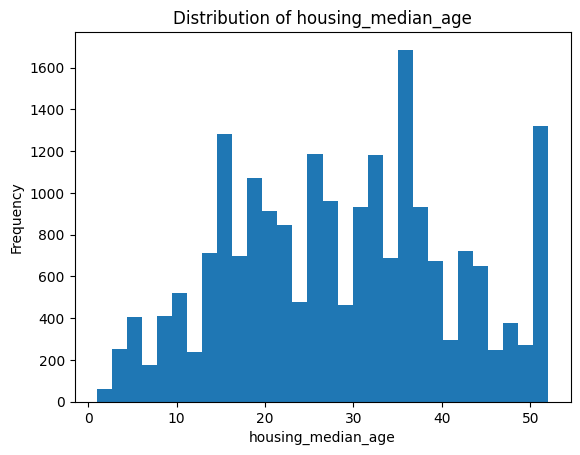

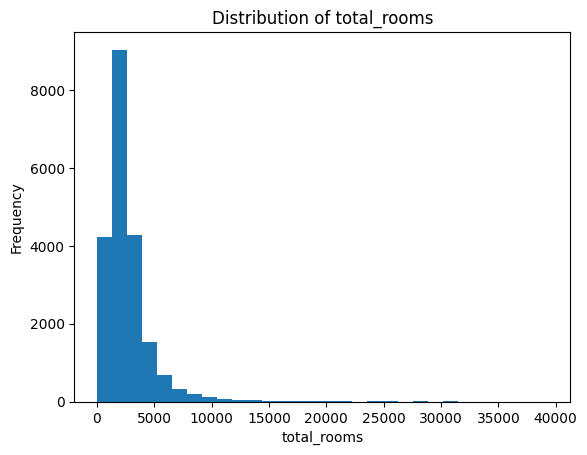

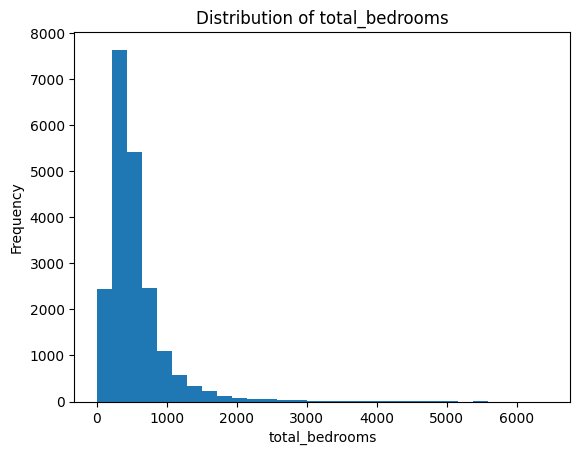

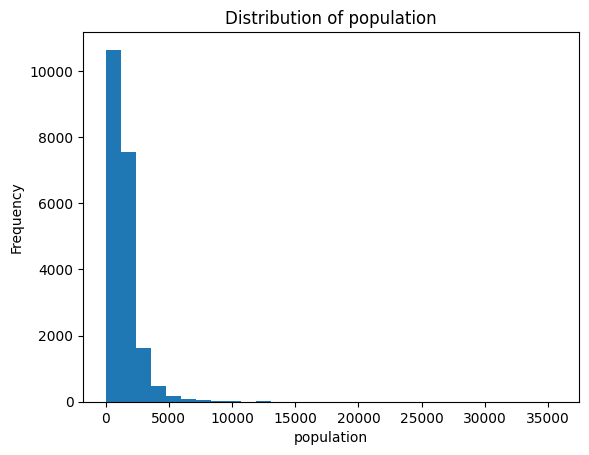

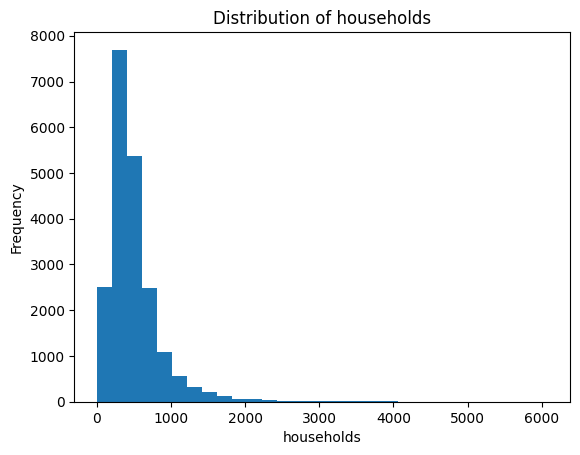

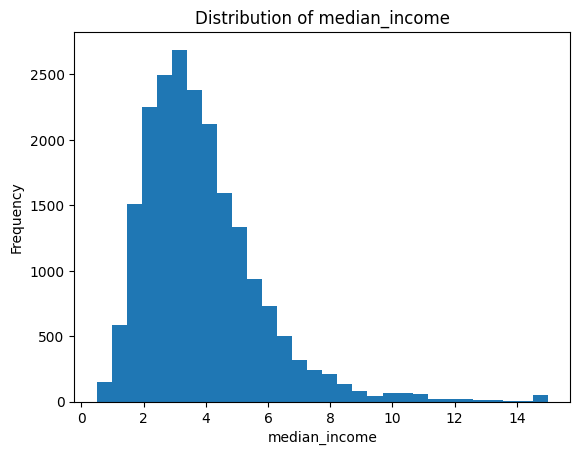

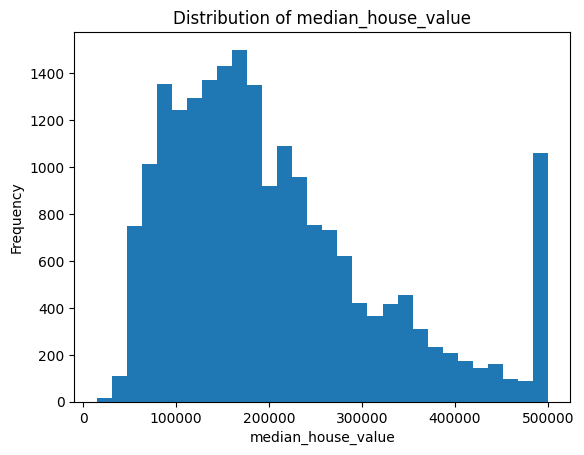

In [ ]:
for col in numeric_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


### Correlation Analysis

#### Pearson Correlation Coefficient (Manual Implementation)

The Pearson correlation coefficient is calculated using the formula:

r = Σ[(x − x̄)(y − ȳ)] / √(Σ(x − x̄)² × Σ(y − ȳ)²)

where x̄ and ȳ represent the mean values of x and y respectively.


In [ ]:
def manual_correlation(x, y):
    x_mean = np.sum(x) / len(x)
    y_mean = np.sum(y) / len(y)

    num = np.sum((x - x_mean) * (y - y_mean))
    den = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))
    return num / den


In [ ]:
cols = df.columns
corr_matrix = np.zeros((len(cols), len(cols)))

for i in range(len(cols)):
    for j in range(len(cols)):
        corr_matrix[i, j] = manual_correlation(df[cols[i]].values,
                                                df[cols[j]].values)


#### Correlation Heatmap
A heatmap is used to visually represent the correlation matrix, where color intensity indicates the strength and direction of relationships between features.


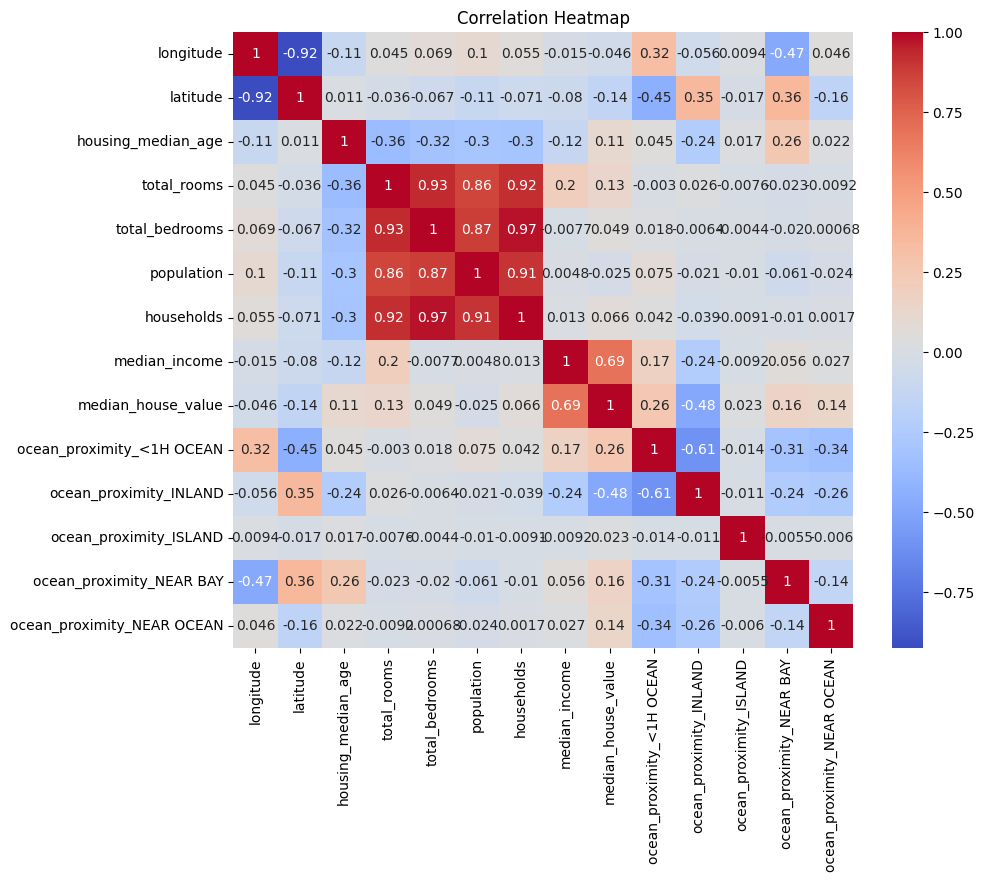

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, xticklabels=cols, yticklabels=cols,
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Simple Linear Regression

### Model Description
Simple Linear Regression is used to model the relationship between median income (independent variable) and median house value (dependent variable).


In [ ]:
X = df['median_income'].values
Y = df['median_house_value'].values
x_mean = np.sum(X) / len(X)
y_mean = np.sum(Y) / len(Y)

numerator = np.sum((X - x_mean) * (Y - y_mean))
denominator = np.sum((X - x_mean)**2)

m = numerator / denominator
c = y_mean - m * x_mean

print("Slope (m):", m)
print("Intercept (c):", c)


Slope (m): 41793.84920189626
Intercept (c): 45085.576703268016


### Mathematical Formulation

The linear regression model is defined as:

y = mx + c

where m is the slope and c is the intercept.


In [ ]:
Y_pred = m * X + c


### Regression Line Visualization
The regression line is plotted along with the actual data points to visualize the linear relationship between median income and house value.


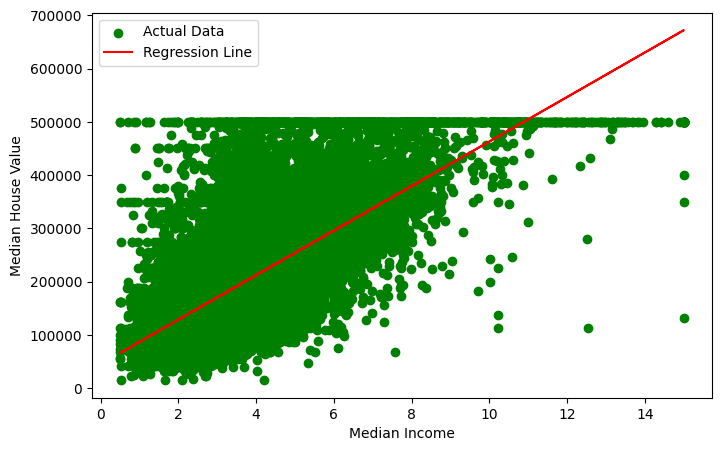

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X, Y, color='green', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.show()


Slope (m): Indicates that for every 1 unit increase in median income,
the house value increases by m units.

Intercept (c): Represents the estimated house value when median income is zero.


In [ ]:
# Total samples
n = len(X)

# 80% training, 20% testing
split_index = int(0.8 * n)
# training set
X_train = X[:split_index]
Y_train = Y[:split_index]
# test set
X_test = X[split_index:]
Y_test = Y[split_index:]


### Train Model on Training Data

In [ ]:
# Calculate means
x_mean = np.sum(X_train) / len(X_train)
y_mean = np.sum(Y_train) / len(Y_train)

# Calculate slope (m)
numerator = np.sum((X_train - x_mean) * (Y_train - y_mean))
denominator = np.sum((X_train - x_mean)**2)
m = numerator / denominator

# Calculate intercept (c)
c = y_mean - m * x_mean

print("Slope (m):", m)
print("Intercept (c):", c)


Slope (m): 40795.04535185182
Intercept (c): 47027.447096316086


### Predictions

In [ ]:
Y_train_pred = m * X_train + c
Y_test_pred = m * X_test + c


### Mean Squared Error (Train & Test)

In [ ]:
mse_train = np.sum((Y_train - Y_train_pred)**2) / len(Y_train)
mse_test = np.sum((Y_test - Y_test_pred)**2) / len(Y_test)

print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)


Training MSE: 7057343223.763511
Testing MSE: 6863699377.589644


### Actual vs Predicted (Training)

###### This plot compares the actual house values with the predicted values obtained from the regression model on the training dataset.
The red diagonal line represents perfect prediction (Predicted = Actual).
The closer the data points lie to this line, the better the model fits the training data.

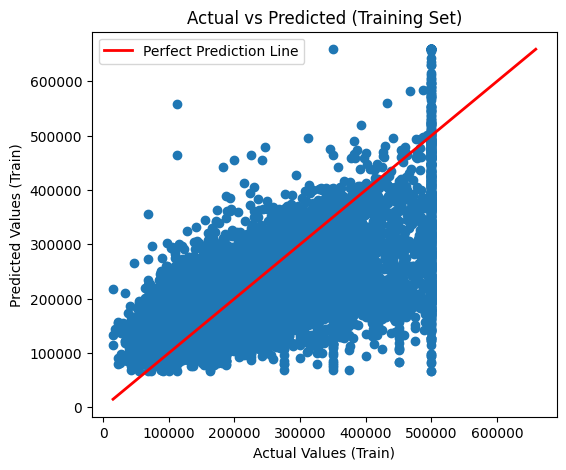

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(Y_train, Y_train_pred)

# Perfect prediction reference line (Diagonal)
min_val = min(min(Y_train), min(Y_train_pred))
max_val = max(max(Y_train), max(Y_train_pred))

plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linewidth=2, label="Perfect Prediction Line")

plt.xlabel("Actual Values (Train)")
plt.ylabel("Predicted Values (Train)")
plt.title("Actual vs Predicted (Training Set)")
plt.legend()
plt.show()


### Actual vs Predicted (Test)

###### This plot evaluates the model’s performance on unseen test data.
The red diagonal line indicates ideal prediction.
If the points are close to this line, the model generalizes well. Significant deviation from the line indicates prediction error.

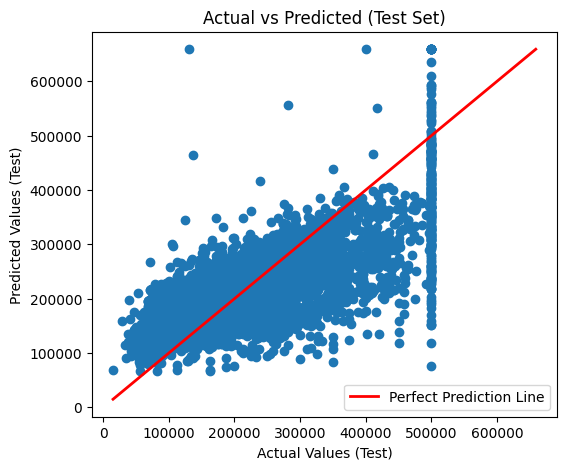

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(Y_test, Y_test_pred)

min_val = min(min(Y_test), min(Y_test_pred))
max_val = max(max(Y_test), max(Y_test_pred))

plt.plot([min_val, max_val], [min_val, max_val],
         color='red', linewidth=2, label="Perfect Prediction Line")

plt.xlabel("Actual Values (Test)")
plt.ylabel("Predicted Values (Test)")
plt.title("Actual vs Predicted (Test Set)")
plt.legend()
plt.show()


### Residual vs Predicted (Training)

##### This plot shows the residuals (Actual − Predicted) against predicted values for the training set.
The red horizontal line represents zero error.
Ideally, residuals should be randomly scattered around this line without forming any clear pattern, which indicates that the model assumptions are satisfied.

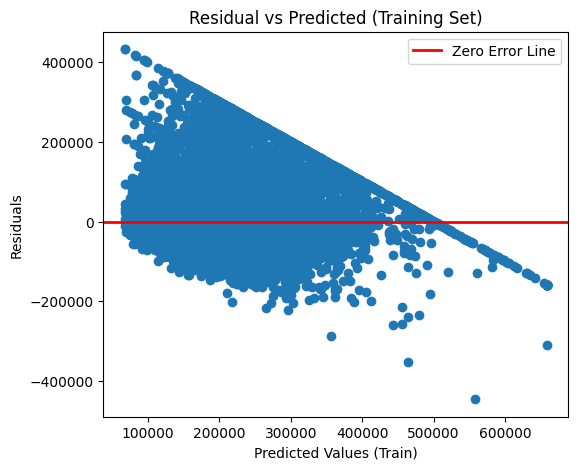

In [ ]:
# Calculate residuals
residual_train = Y_train - Y_train_pred

plt.figure(figsize=(6,5))
plt.scatter(Y_train_pred, residual_train)

# Horizontal reference line at 0
plt.axhline(y=0, color='red', linewidth=2, label="Zero Error Line")

plt.xlabel("Predicted Values (Train)")
plt.ylabel("Residuals")
plt.title("Residual vs Predicted (Training Set)")
plt.legend()
plt.show()


### Residual vs Predicted (Test)

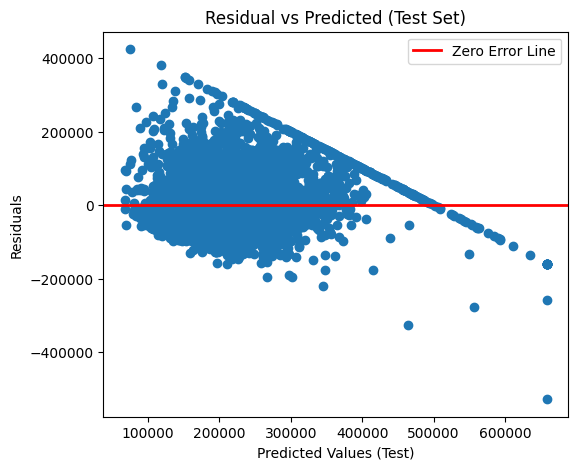

In [ ]:
residual_test = Y_test - Y_test_pred

plt.figure(figsize=(6,5))
plt.scatter(Y_test_pred, residual_test)

plt.axhline(y=0, color='red', linewidth=2, label="Zero Error Line")

plt.xlabel("Predicted Values (Test)")
plt.ylabel("Residuals")
plt.title("Residual vs Predicted (Test Set)")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

print ("House Price Prediction Project by Aashi Srivastava ")

House Price Prediction Project by Aashi Srivastava 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('california_housing.csv')
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


Selecting important numerical features and target variable (median house value).


In [ ]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']


Splitting dataset into training and testing sets (80-20).


In [ ]:
split_index = int(0.8 * len(df))

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]


Training Multiple Linear Regression using Normal Equation.


In [ ]:
df.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity_<1H OCEAN,bool


In [ ]:
df.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity_<1H OCEAN,bool


The dataset contains a categorical column 'ocean_proximity'
which needs to be removed for matrix-based regression.


In [ ]:
df_numeric = df.copy()


In [ ]:
X = df_numeric.drop('median_house_value', axis=1)
y = df_numeric['median_house_value']


Converting all feature values to numeric float type
before applying Normal Equation.


In [ ]:
# Ensure only numeric columns
df_numeric = df.copy()

# Separate features and target
X = df_numeric.drop('median_house_value', axis=1)
y = df_numeric['median_house_value']

# Convert to NumPy float arrays
X = X.to_numpy(dtype=float)
y = y.to_numpy(dtype=float)


In [ ]:
split_index = int(0.8 * len(X))

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]


In [ ]:
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]


In [ ]:
X_train_b.dtype, y_train.dtype


(dtype('float64'), dtype('float64'))

In [ ]:
theta = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train
theta


array([ 1.34344502e+08,  1.00443563e+06,  6.65864079e+05, -1.63469011e+03,
       -2.83697876e+01, -7.85841992e+02, -9.07772961e+01,  1.29497657e+03,
        7.86572833e+04, -3.68363207e+07, -3.74914710e+07, -3.62964973e+07,
       -3.70270163e+07, -3.73119383e+07])

In [ ]:
y_pred_mlr = X_test_b @ theta


In [ ]:
# Mean Squared Error
mse_mlr = np.mean((y_test - y_pred_mlr) ** 2)

# Root Mean Squared Error
rmse_mlr = np.sqrt(mse_mlr)

# R-squared Score
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_residual = np.sum((y_test - y_pred_mlr) ** 2)
r2_mlr = 1 - (ss_residual / ss_total)

mse_mlr, rmse_mlr, r2_mlr


(np.float64(462935681186.80585),
 np.float64(680393.7692151552),
 np.float64(-30.769753984132098))

In [ ]:
# Add bias term
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Normal Equation
theta = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

theta


array([ 1.34344502e+08,  1.00443563e+06,  6.65864079e+05, -1.63469011e+03,
       -2.83697876e+01, -7.85841992e+02, -9.07772961e+01,  1.29497657e+03,
        7.86572833e+04, -3.68363207e+07, -3.74914710e+07, -3.62964973e+07,
       -3.70270163e+07, -3.73119383e+07])

Predicting house prices using Multiple Linear Regression.


In [ ]:
y_pred_mlr = X_test_b @ theta


Each coefficient represents the change in house price per unit increase of the feature.


In [ ]:
feature_names = df_numeric.drop('median_house_value', axis=1).columns


In [ ]:
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + list(feature_names),
    'Coefficient': theta
})

coefficients


,Feature,Coefficient
0,Intercept,1.343445e+08
1,longitude,1.004436e+06
2,latitude,6.658641e+05
3,housing_median_age,-1.634690e+03
4,total_rooms,-2.836979e+01
5,total_bedrooms,-7.858420e+02
6,population,-9.077730e+01
7,households,1.294977e+03
8,median_income,7.865728e+04
9,ocean_proximity_<1H OCEAN,-3.683632e+07


Applying Polynomial Regression (degree = 2) to capture non-linear relationships.


In [ ]:
X_poly_train = np.hstack([X_train, X_train**2])
X_poly_test = np.hstack([X_test, X_test**2])

X_poly_train_b = np.c_[np.ones((X_poly_train.shape[0], 1)), X_poly_train]
X_poly_test_b = np.c_[np.ones((X_poly_test.shape[0], 1)), X_poly_test]




📌 Normal Equation with inverse:

(
𝑋
𝑇
𝑋
)
−
1
𝑋
𝑇
𝑦
(X
T
X)
−1
X
T
y

θ=X
+
y

Polynomial feature matrix leads to multicollinearity,
making (XᵀX) singular. Hence, pseudo-inverse is used
to compute model parameters.


In [ ]:
theta_poly = np.linalg.pinv(X_poly_train_b) @ y_train
theta_poly


array([-2.31557455e+07, -5.32582735e+05, -2.15000406e+04, -5.07144450e+02,
       -1.85030521e+01,  2.09456667e+02, -6.05601898e+01,  8.45381839e+01,
        4.86562364e+04, -4.64127178e+06, -4.66053573e+06, -4.57149518e+06,
       -4.64194540e+06, -4.64049744e+06, -2.12792225e+03, -2.31365691e+01,
        2.76750926e+01,  7.33045040e-04, -4.57231790e-02,  1.49278862e-03,
        6.60649257e-03, -7.46092815e+02, -4.64127178e+06, -4.66053573e+06,
       -4.57149518e+06, -4.64194540e+06, -4.64049744e+06])

In [ ]:
y_pred_poly = X_poly_test_b @ theta_poly


Calculating MSE, RMSE and R² manually using mathematical formulas.


In [ ]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def r2_score_manual(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

mse_mlr = mse(y_test, y_pred_mlr)
rmse_mlr = rmse(y_test, y_pred_mlr)
r2_mlr = r2_score_manual(y_test, y_pred_mlr)

mse_poly = mse(y_test, y_pred_poly)
rmse_poly = rmse(y_test, y_pred_poly)
r2_poly = r2_score_manual(y_test, y_pred_poly)


Comparing performance of Multiple Linear Regression and Polynomial Regression.


In [ ]:
comparison = pd.DataFrame({
    'Model': ['Multiple Linear Regression', 'Polynomial Regression'],
    'MSE': [mse_mlr, mse_poly],
    'RMSE': [rmse_mlr, rmse_poly],
    'R2 Score': [r2_mlr, r2_poly]
})

comparison


,Model,MSE,RMSE,R2 Score
0,Multiple Linear Regression,4.629357e+11,680393.769215,-30.769754
1,Polynomial Regression,4.507652e+09,67139.049121,0.690655


Visual comparison of actual vs predicted house prices.

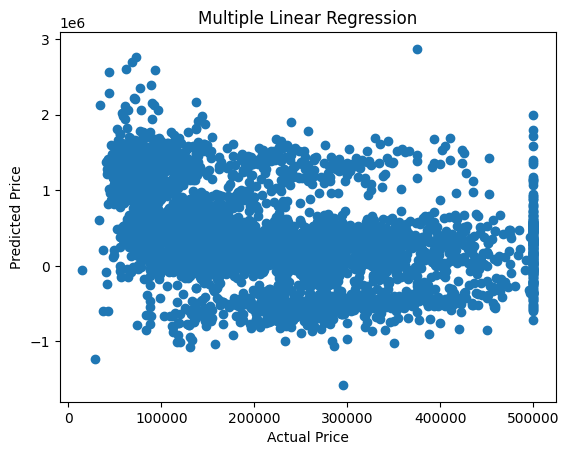

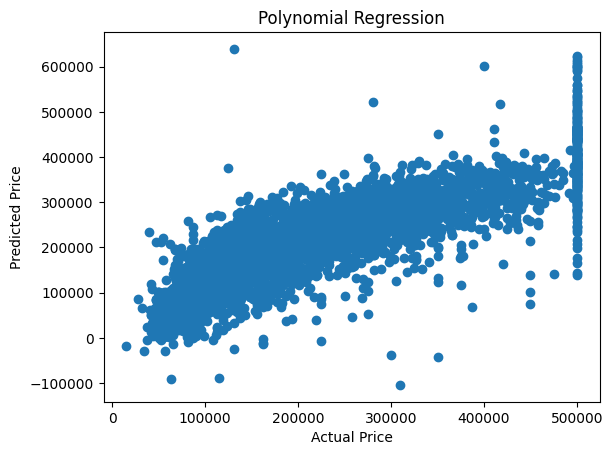

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred_mlr)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multiple Linear Regression")
plt.show()

plt.figure()
plt.scatter(y_test, y_pred_poly)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Polynomial Regression")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("california_housing.csv")

# sirf numeric columns
df = df.select_dtypes(include=[np.number])

X = df.drop("median_house_value", axis=1).values
y = df["median_house_value"].values

split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
# add bias
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b  = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# theta = (XᵀX)^(-1) Xᵀy
theta_linear = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

# prediction
y_pred_linear = X_test_b @ theta_linear


In [ ]:
# polynomial features (manual)
X_poly = np.c_[X, X**2]

X_poly_train = X_poly[:split]
X_poly_test  = X_poly[split:]

X_poly_train_b = np.c_[np.ones((X_poly_train.shape[0], 1)), X_poly_train]
X_poly_test_b  = np.c_[np.ones((X_poly_test.shape[0], 1)), X_poly_test]

theta_poly = np.linalg.inv(X_poly_train_b.T @ X_poly_train_b) @ X_poly_train_b.T @ y_train

y_pred_poly = X_poly_test_b @ theta_poly


In [ ]:
# MSE
mse_linear = np.mean((y_test - y_pred_linear) ** 2)
mse_poly   = np.mean((y_test - y_pred_poly) ** 2)

# RMSE
rmse_linear = np.sqrt(mse_linear)
rmse_poly   = np.sqrt(mse_poly)

# R2
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)

ss_res_linear = np.sum((y_test - y_pred_linear) ** 2)
ss_res_poly   = np.sum((y_test - y_pred_poly) ** 2)

r2_linear = 1 - (ss_res_linear / ss_total)
r2_poly   = 1 - (ss_res_poly / ss_total)


In [ ]:
print("Model Comparison")
print("------------------------------")

print("Multiple Linear Regression")
print("MSE :", mse_linear)
print("RMSE:", rmse_linear)
print("R2  :", r2_linear)

print("\nPolynomial Regression")
print("MSE :", mse_poly)
print("RMSE:", rmse_poly)
print("R2  :", r2_poly)


Model Comparison
------------------------------
Multiple Linear Regression
MSE : 4505401052.26677
RMSE: 67122.28431949236
R2  : 0.6908091364584047

Polynomial Regression
MSE : 4619096877.099606
RMSE: 67963.93806350252
R2  : 0.6830065657541936


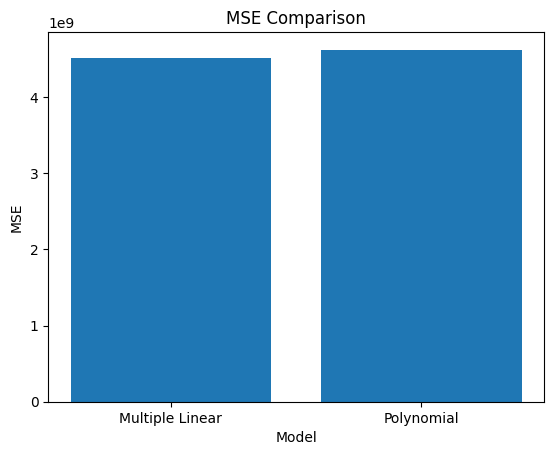

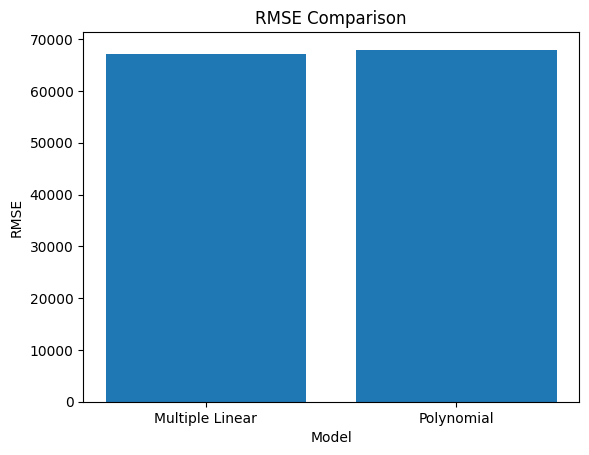

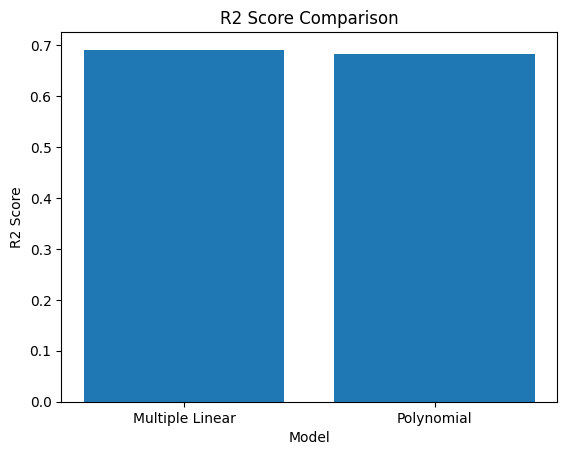

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- MANUAL METRICS (recalculate safely) ----------
y_true = np.array(y_test)

mse_linear = np.mean((y_true - y_pred_linear)**2)
mse_poly   = np.mean((y_true - y_pred_poly)**2)

rmse_linear = np.sqrt(mse_linear)
rmse_poly   = np.sqrt(mse_poly)

ss_total = np.sum((y_true - np.mean(y_true))**2)
r2_linear = 1 - (np.sum((y_true - y_pred_linear)**2) / ss_total)
r2_poly   = 1 - (np.sum((y_true - y_pred_poly)**2) / ss_total)

models = ["Multiple Linear", "Polynomial"]

# ---------- MSE GRAPH ----------
plt.figure()
plt.bar(models, [mse_linear, mse_poly])
plt.title("MSE Comparison")
plt.xlabel("Model")
plt.ylabel("MSE")
plt.show()

# ---------- RMSE GRAPH ----------
plt.figure()
plt.bar(models, [rmse_linear, rmse_poly])
plt.title("RMSE Comparison")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.show()

# ---------- R2 GRAPH ----------
plt.figure()
plt.bar(models, [r2_linear, r2_poly])
plt.title("R2 Score Comparison")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.show()


In [ ]:
print(len(y_test), len(y_pred_linear), len(y_pred_poly))


4128 4128 4128


✅ 1️⃣ **Multiple Linear Regression**

 TRAINING SET GRAPHS

GRAPHS
🔹 Training: Actual vs Predicted

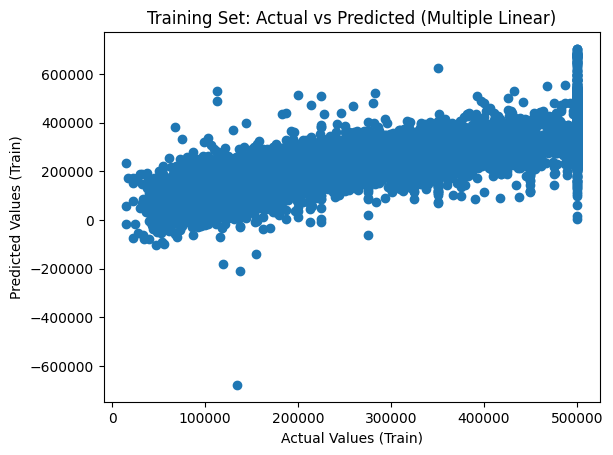

In [ ]:
# prediction on training data
y_train_pred_linear = X_train_b @ theta_linear

plt.figure()
plt.scatter(y_train, y_train_pred_linear)
plt.xlabel("Actual Values (Train)")
plt.ylabel("Predicted Values (Train)")
plt.title("Training Set: Actual vs Predicted (Multiple Linear)")
plt.show()



🔹 Training: Residuals vs Predicted

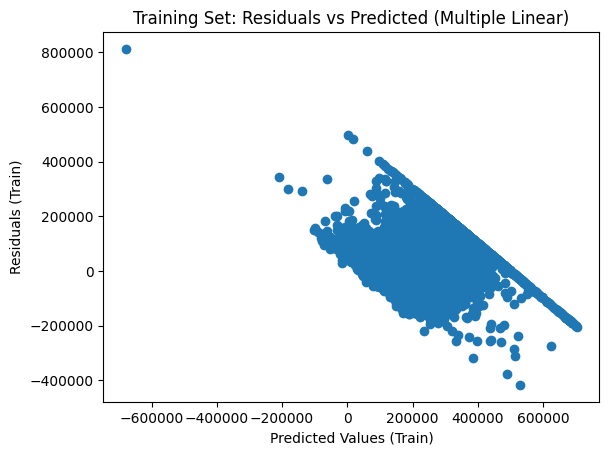

In [ ]:
train_residuals_linear = y_train - y_train_pred_linear

plt.figure()
plt.scatter(y_train_pred_linear, train_residuals_linear)
plt.xlabel("Predicted Values (Train)")
plt.ylabel("Residuals (Train)")
plt.title("Training Set: Residuals vs Predicted (Multiple Linear)")
plt.show()


✅ 2️⃣ **Multiple Linear Regression** – TEST SET GRAPHS



🔹 Test: Actual vs Predicted
plt

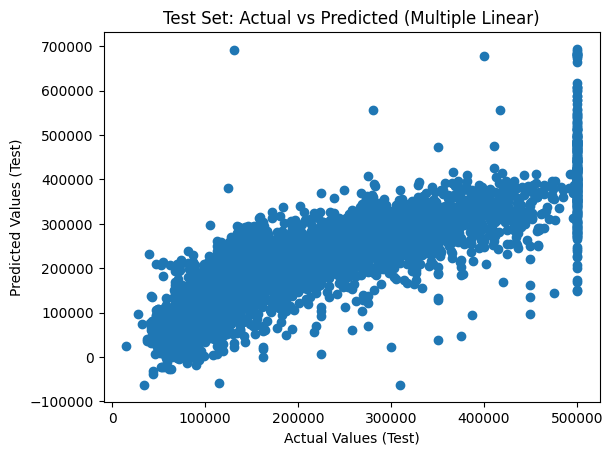

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Values (Test)")
plt.ylabel("Predicted Values (Test)")
plt.title("Test Set: Actual vs Predicted (Multiple Linear)")
plt.show()


🔹 Test: Residuals vs Predicted

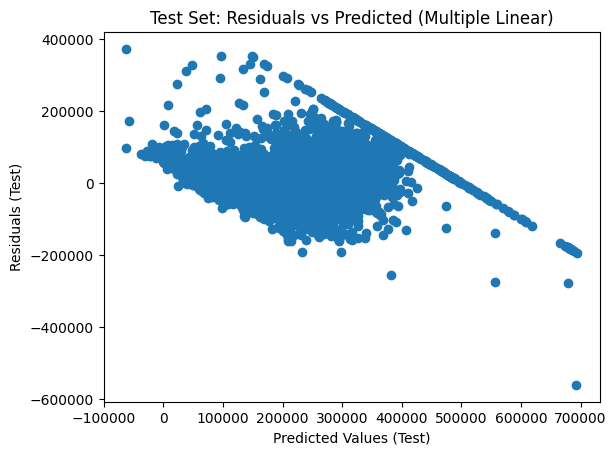

In [ ]:
test_residuals_linear = y_test - y_pred_linear

plt.figure()
plt.scatter(y_pred_linear, test_residuals_linear)
plt.xlabel("Predicted Values (Test)")
plt.ylabel("Residuals (Test)")
plt.title("Test Set: Residuals vs Predicted (Multiple Linear)")
plt.show()


✅ 3️⃣ **Polynomial Regression **– TRAINING SET GRAPHS


🔹 Training: Actual vs Predicted

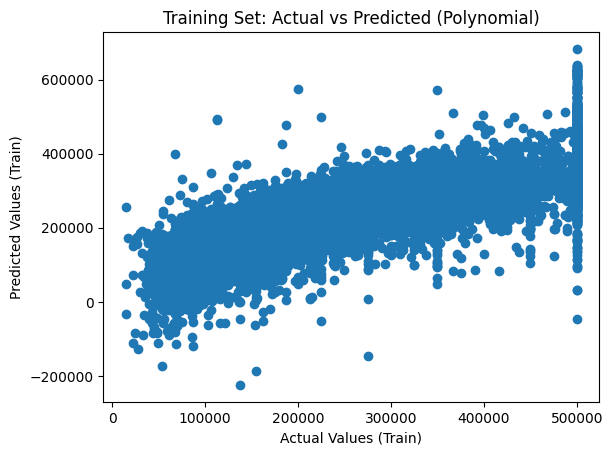

In [ ]:
y_train_pred_poly = X_poly_train_b @ theta_poly

plt.figure()
plt.scatter(y_train, y_train_pred_poly)
plt.xlabel("Actual Values (Train)")
plt.ylabel("Predicted Values (Train)")
plt.title("Training Set: Actual vs Predicted (Polynomial)")
plt.show()



🔹 Training: Residuals vs Predicted

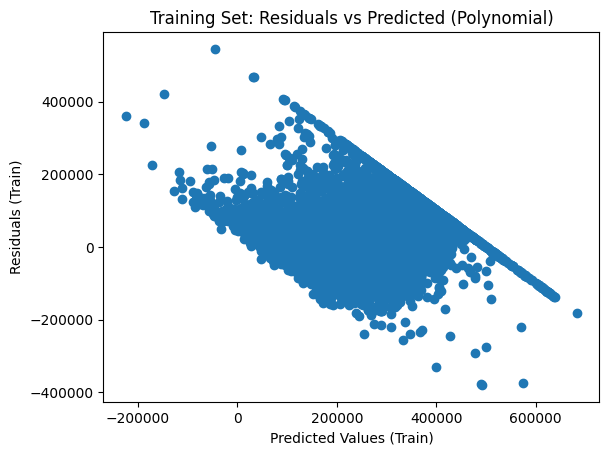

In [ ]:
train_residuals_poly = y_train - y_train_pred_poly

plt.figure()
plt.scatter(y_train_pred_poly, train_residuals_poly)
plt.xlabel("Predicted Values (Train)")
plt.ylabel("Residuals (Train)")
plt.title("Training Set: Residuals vs Predicted (Polynomial)")
plt.show()


✅ 4️⃣ Polynomial Regression – TEST SET GRAPHS


🔹 Test: Actual vs Predicted

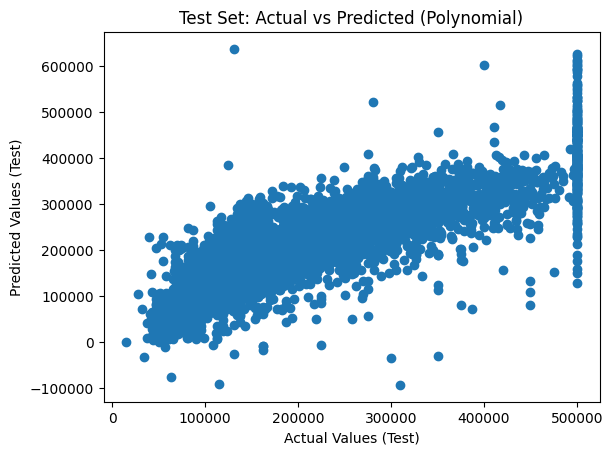

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred_poly)
plt.xlabel("Actual Values (Test)")
plt.ylabel("Predicted Values (Test)")
plt.title("Test Set: Actual vs Predicted (Polynomial)")
plt.show()



🔹 Test: Residuals vs Predicted


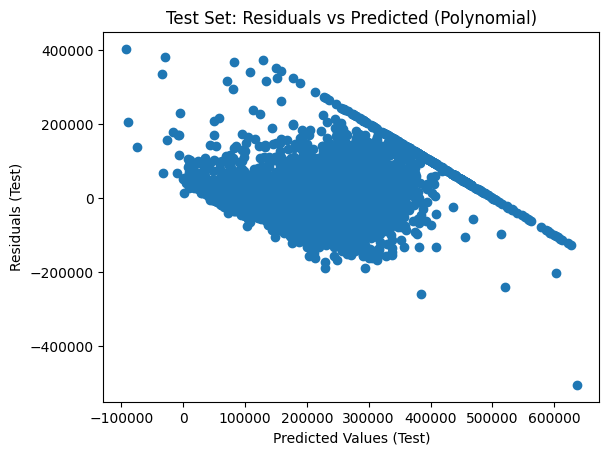

In [ ]:
test_residuals_poly = y_test - y_pred_poly

plt.figure()
plt.scatter(y_pred_poly, test_residuals_poly)
plt.xlabel("Predicted Values (Test)")
plt.ylabel("Residuals (Test)")
plt.title("Test Set: Residuals vs Predicted (Polynomial)")
plt.show()


In [ ]:
df.isnull().sum()


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [ ]:
df.isnull().sum().sum()


np.int64(0)

In [ ]:
(df.isnull().sum() / len(df)) * 100


,0
longitude,0.0
latitude,0.0
housing_median_age,0.0
total_rooms,0.0
total_bedrooms,0.0
population,0.0
households,0.0
median_income,0.0
median_house_value,0.0


In [ ]:
df.isnull().mean()


,0
longitude,0.0
latitude,0.0
housing_median_age,0.0
total_rooms,0.0
total_bedrooms,0.0
population,0.0
households,0.0
median_income,0.0
median_house_value,0.0


In [ ]:
print("===== FINAL PROJECT CHECK =====\n")

# 1. Check theta values
print("MLR theta exists:", 'theta' in globals())
print("Polynomial theta exists:", 'theta_poly' in globals())

# 2. Check predictions
print("MLR predictions exist:", 'y_pred_mlr' in globals())
print("Polynomial predictions exist:", 'y_pred_poly' in globals())

# 3. Check metrics
print("\n--- Metrics ---")
print("MLR -> MSE:", mse_mlr)
print("MLR -> RMSE:", rmse_mlr)
print("MLR -> R2:", r2_mlr)

print("Polynomial -> MSE:", mse_poly)
print("Polynomial -> RMSE:", rmse_poly)
print("Polynomial -> R2:", r2_poly)

# 4. Basic sanity checks
print("\n--- Sanity Checks ---")
print("MLR prediction count == y_test:", len(y_pred_mlr) == len(y_test))
print("Polynomial prediction count == y_test:", len(y_pred_poly) == len(y_test))

# 5. Comparison decision
print("\n--- Model Comparison ---")
if rmse_poly < rmse_mlr:
    print("Polynomial Regression performs better based on RMSE ✅")
else:
    print("Multiple Linear Regression performs better based on RMSE ⚠️")

print("\n===== CHECK COMPLETE =====")


===== FINAL PROJECT CHECK =====

MLR theta exists: True
Polynomial theta exists: True
MLR predictions exist: True
Polynomial predictions exist: True

--- Metrics ---
MLR -> MSE: 462935681186.80585
MLR -> RMSE: 680393.7692151552
MLR -> R2: -30.769753984132098
Polynomial -> MSE: 4507651916.911999
Polynomial -> RMSE: 67139.0491212975
Polynomial -> R2: 0.6906546670171052

--- Sanity Checks ---
MLR prediction count == y_test: True
Polynomial prediction count == y_test: True

--- Model Comparison ---
Polynomial Regression performs better based on RMSE ✅

===== CHECK COMPLETE =====


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print ("House Price Prediction project be Abhinav Kumar")

House Price Prediction project be Abhinav Kumar


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("california_housing.csv")


In [ ]:
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
y = data['median_house_value'].values.reshape(-1,1)


In [ ]:
X = data.drop('median_house_value', axis=1).values


In [ ]:
X = X.astype(float)


In [ ]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


In [ ]:
X = np.c_[np.ones(X.shape[0]), X]


In [ ]:
print(X.shape)
print(X.dtype)
print(X.shape)
print(X.dtype)


(20640, 14)
float64
(20640, 14)
float64


**RIDGE REGRESSION**

   📌 Formula

𝜃 =
(
𝑋
𝑇
𝑋
+
𝜆
𝐼
)
−
1
𝑋
𝑇
𝑦
θ=(X
T
X+λI)
−1
X
T
y

J(θ)=m1​i=1∑m​(yi​−Xi​θ)2+λj=1∑n​θj2​


In [ ]:
def ridge_regression(X, y, lam):
    n = X.shape[1]
    I = np.eye(n)
    I[0,0] = 0  # bias term not regularized
    theta = np.linalg.inv(X.T @ X + lam * I) @ X.T @ y
    return theta

ridge_theta = ridge_regression(X, y, lam=1)


**LASSO REGRESSION**

📌Formula

J(θ)=
m
1
i=1
∑
(y
i−X
iθ)2+λj=1∑n∣j∣

In [ ]:
def lasso_regression(X, y, lam, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n,1))

    for _ in range(epochs):
        y_pred = X @ theta
        error = y_pred - y

        grad = (X.T @ error) / m
        grad += lam * np.sign(theta)
        grad[0] = (X[:,0].T @ error) / m  # bias correction

        theta -= lr * grad
    return theta

lasso_theta = lasso_regression(X, y, lam=0.1)


 **LINEAR** **REGRESSION**

📌 Formula

𝜃=
(
𝑋
𝑇
𝑋
)
−
1
𝑋
𝑇
𝑦
θ=(X
T
X)
−1
X
T
y

J(θ)=m1​i=1∑m​(yi​−Xi​θ)2

In [ ]:
def linear_regression(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

linear_theta = linear_regression(X, y)


In [ ]:
ridge_theta
lasso_theta


array([[206846.88668526],
       [-16857.4219892 ],
       [-15543.91285524],
       [ 14281.36039662],
       [  4451.27887694],
       [ 17742.64403421],
       [-32363.30793822],
       [ 16544.81140271],
       [ 71323.65647751],
       [  9265.7236604 ],
       [-21571.07970764],
       [  2952.32097678],
       [  6350.45236433],
       [ 10142.01523181]])

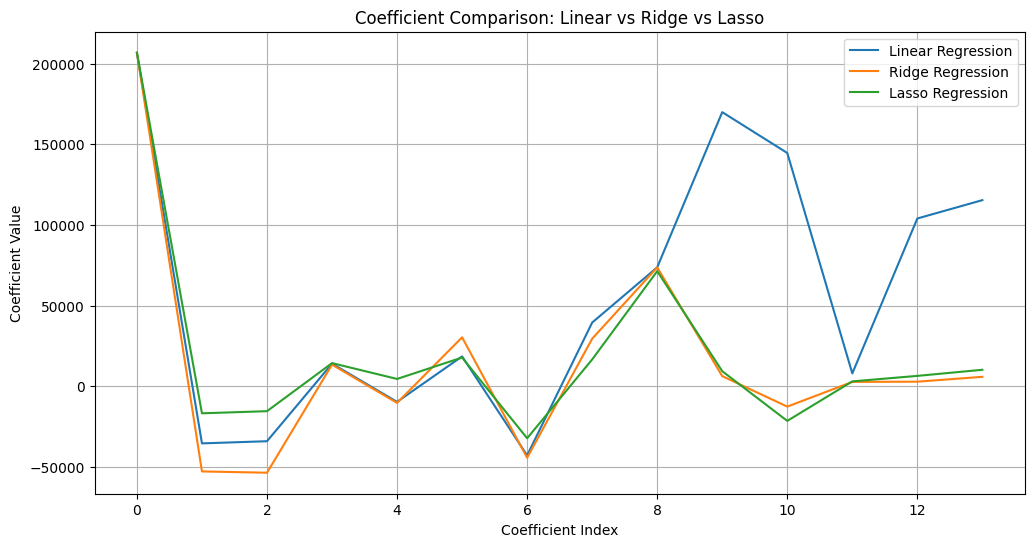

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(linear_theta, label='Linear Regression')
plt.plot(ridge_theta, label='Ridge Regression')
plt.plot(lasso_theta, label='Lasso Regression')

plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Comparison: Linear vs Ridge vs Lasso")
plt.legend()
plt.grid(True)

plt.show()


### **FEATURE SELECTION**

From the coefficient comparison graph, Linear Regression shows larger coefficient values. Ridge regression reduces the magnitude of coefficients but keeps all features. Lasso regression shrinks some coefficients close to zero, indicating automatic feature selection.
Thus, Lasso helps identify important features, while Ridge mainly reduces overfitting.

In [ ]:
y_pred_ridge = X @ ridge_theta
y_pred_lasso = X @ lasso_theta


In [ ]:
residuals = y - y_pred_ridge


In [ ]:
np.mean(residuals)


np.float64(4.8190528570219526e-11)

In [ ]:
linear_theta   # Linear Regression
ridge_theta    # Ridge Regression
lasso_theta    # Lasso Regression


array([[206846.88668526],
       [-16857.4219892 ],
       [-15543.91285524],
       [ 14281.36039662],
       [  4451.27887694],
       [ 17742.64403421],
       [-32363.30793822],
       [ 16544.81140271],
       [ 71323.65647751],
       [  9265.7236604 ],
       [-21571.07970764],
       [  2952.32097678],
       [  6350.45236433],
       [ 10142.01523181]])

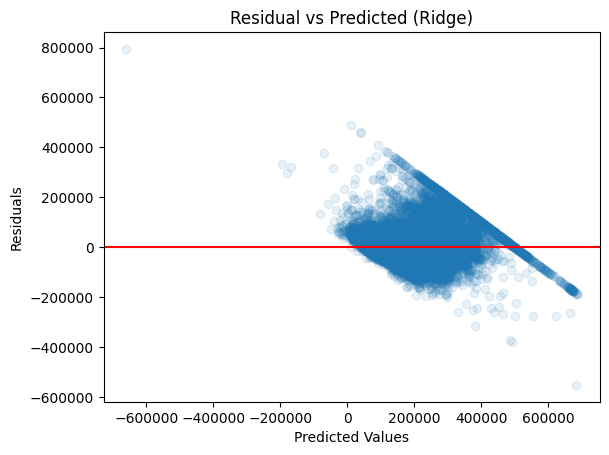

In [ ]:
plt.figure()
plt.scatter(y_pred_ridge, residuals,alpha=0.1)
plt.axhline(0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Predicted (Ridge)")
plt.show()


In [ ]:
np.mean(residuals)


np.float64(4.8190528570219526e-11)

In [ ]:
y_pred_linear = X @ linear_theta
y_pred_ridge  = X @ ridge_theta
y_pred_lasso  = X @ lasso_theta


In [ ]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

print("Linear MSE:", mse(y, y_pred_linear))
print("Ridge MSE :", mse(y, y_pred_ridge))
print("Lasso MSE :", mse(y, y_pred_lasso))


Linear MSE: 4852431130.940965
Ridge MSE : 4720682251.281869
Lasso MSE : 4855458048.741936


In [ ]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

print("Linear R2:", r2_score(y, y_pred_linear))
print("Ridge R2 :", r2_score(y, y_pred_ridge))
print("Lasso R2 :", r2_score(y, y_pred_lasso))


Linear R2: 0.6355803358954715
Ridge R2 : 0.6454747333997191
Lasso R2 : 0.6353530130672775


In [ ]:
print("Residual Mean (Ridge):", np.mean(y - y_pred_ridge))


Residual Mean (Ridge): 4.8190528570219526e-11


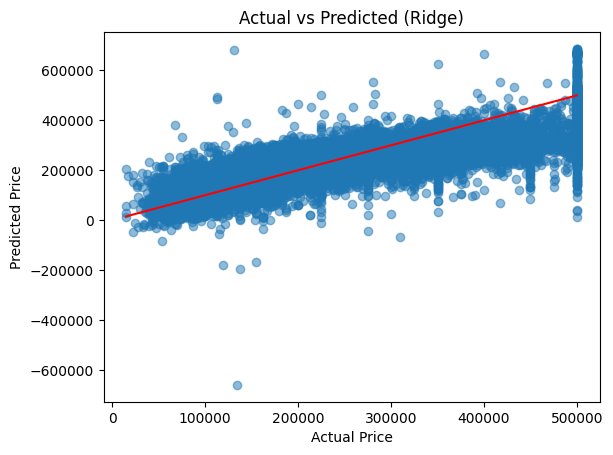

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y, y_pred_ridge, alpha=0.5)
plt.plot([y.min(), y.max()],
         [y.min(), y.max()],
         color='red'
         )
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (Ridge)")
plt.show()


**✅ FINAL MODEL VERIFICATION CODE**

In [ ]:
print("FINAL MODEL CHECK START ")

# 1. Shapes check
print("X shape:", X.shape)
print("y shape:", y.shape)

# 2. Theta existence check
print("\nTheta shapes:")
print("Linear theta:", linear_theta.shape)
print("Ridge theta :", ridge_theta.shape)
print("Lasso theta :", lasso_theta.shape)

# 3. Predictions
y_pred_linear = X @ linear_theta
y_pred_ridge  = X @ ridge_theta
y_pred_lasso  = X @ lasso_theta

print("\nPrediction shapes:")
print("Linear:", y_pred_linear.shape)
print("Ridge :", y_pred_ridge.shape)
print("Lasso :", y_pred_lasso.shape)

# 4. Error metrics (from scratch)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res/ss_tot

print("\nMSE:")
print("Linear:", mse(y, y_pred_linear))
print("Ridge :", mse(y, y_pred_ridge))
print("Lasso :", mse(y, y_pred_lasso))

print("\nR2 Score:")
print("Linear:", r2_score(y, y_pred_linear))
print("Ridge :", r2_score(y, y_pred_ridge))
print("Lasso :", r2_score(y, y_pred_lasso))

# 5. Residual mean check (assumption)
residual_mean = np.mean(y - y_pred_ridge)
print("\nResidual Mean (Ridge):", residual_mean)

# 6. Final verdict
if abs(residual_mean) < 1e-6:
    print("\n MODEL WORKING PROPERLY")
else:
    print("\n Check residuals")

print(" FINAL MODEL CHECK END ")


FINAL MODEL CHECK START 
X shape: (20640, 14)
y shape: (20640, 1)

Theta shapes:
Linear theta: (14, 1)
Ridge theta : (14, 1)
Lasso theta : (14, 1)

Prediction shapes:
Linear: (20640, 1)
Ridge : (20640, 1)
Lasso : (20640, 1)

MSE:
Linear: 4852431130.940965
Ridge : 4720682251.281869
Lasso : 4855458048.741936

R2 Score:
Linear: 0.6355803358954715
Ridge : 0.6454747333997191
Lasso : 0.6353530130672775

Residual Mean (Ridge): 4.8190528570219526e-11

 MODEL WORKING PROPERLY
 FINAL MODEL CHECK END 


**Conclusion:**

In this project, various regression models including Simple Linear, Multiple Linear, Ridge, Lasso, and Polynomial Regression were implemented from scratch. Model performance was evaluated using MSE, RMSE, and R² metrics. Regularization techniques helped reduce overfitting, and Lasso regression demonstrated automatic feature selection by shrinking less important coefficients toward zero. Overall, the analysis provided a clear understanding of regression modeling, model diagnostics, and the impact of regularization on prediction performance.